In [36]:
import matplotlib.pyplot as plt # a module necessary to make a plot
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import numpy.ma as ma
import pandas as pd

In [37]:
#filename='/Users/jungeunl/Cycad/class/data/NDVI_new_2007_2015mon.nc' # on my laptop
filename='NDVI_new_2007_2015mon.nc'

with xr.open_dataset(filename) as ds:
    ndvi=ds.NDVI
    print(ds) 

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 108)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-02-01 ... 2015-12-01
  * lat      (lat) float32 89.5 88.5 87.5 86.5 85.5 ... -86.5 -87.5 -88.5 -89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    NDVI     (time, lat, lon) float32 ...


#### Correcting time axis
Original file had a wrong time axis. I've corrected it using the following method:   
nt=len(ndvi)   
print(nt)   
tstamp=f"2007-01-01 00:00:00"  # First time step   
time_new = pd.date_range(start=tstamp, freq="1MS", periods=nt)      

#### Then, I created a new xarray DataArray.
ndvi_new = xr.DataArray(   
    ndvi,   
    dims=["time", "lat", "lon"],   
    coords={"time": time_new, "lat": ds.lat, "lon": ds.lon},   
                )   
print(ndvi_new)   

#### And, save the DataArray as a netCDF file.
ndvi_new.to_netcdf("NDVI_new_2007_2015mon.nc")   

In [31]:
# Let's calculate climatology for each month
ndvi_clim = ndvi.groupby('time.month').mean(dim='time')

# Calculate anomaly
ndvi_anom = ndvi.groupby('time.month') - ndvi_clim

Let's plot mean January NDVI.

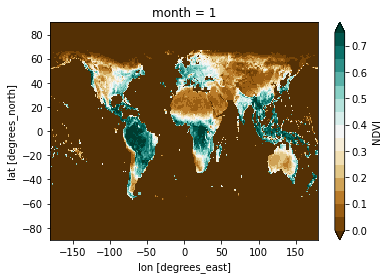

In [32]:
lev1=np.arange(0,0.8,0.05)
# color map
cmap1=plt.cm.BrBG
ndvi_clim.isel(month=0).plot(levels=lev1,cmap=cmap1)

#### Exercise
Let's plot mean July NDVI.

2012 summer was drier than usual in the Midwest. Let's plot the anomaly for July 2012.

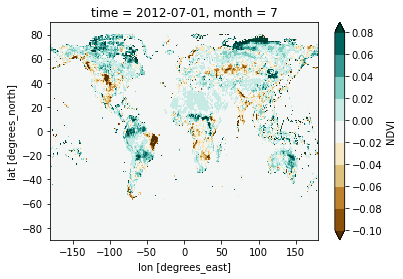

In [43]:
lev2=np.arange(-0.1,0.1,0.02)
ndvi_anom.sel(time="2012-07").plot(cmap=cmap1,levels=lev2)

#### Exercise 
Plot the anomaly for September 2010. Which region did we have drought at that time?